# Logistic Regression  

A **supervised binary classification** algorithm used to categorize data into 2 classes.  
**Example:** Spam mails (spam / not spam), Image classification (cat / dog).  


#### Hypothesis Function  

$$
h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
$$  


#### Loss Function (Binary Cross Entropy / Log Loss)  

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \Big[ y^{(i)} \log \big(h_\theta(x^{(i)})\big) + (1 - y^{(i)}) \log \big(1 - h_\theta(x^{(i)})\big) \Big]
$$  


#### Gradient Update Rule  

$$
\frac{\partial J(\theta)}{\partial \theta_j} = - \sum_{i=1}^{m} \Big( y^{(i)} - h_\theta(x^{(i)}) \Big) \cdot x_j^{(i)}
$$  

$$
\theta_j = \theta_j + \alpha \sum_{i=1}^{m} \Big( y^{(i)} - h_\theta(x^{(i)}) \Big) \cdot x_j^{(i)}
$$  




# Implementation

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Data Preparation

In [31]:
# Generating data using numpy

mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])

#distribution 1 and 2 are different clusters with means as their x and y axis and covariances as their spread
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print (dist_01.shape)
print (dist_02.shape)

(500, 2)
(500, 2)


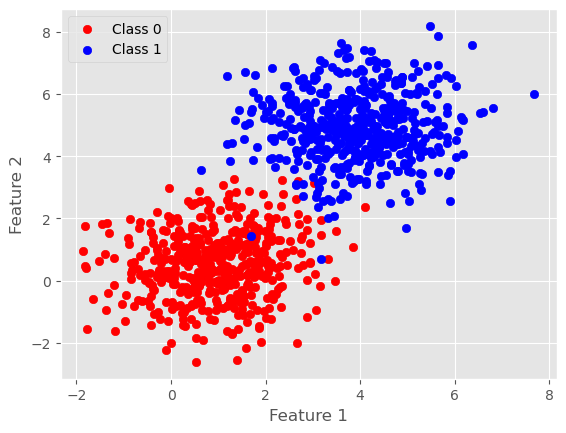

In [32]:
plt.scatter(dist_01[:,0],dist_01[:,1],color='r', label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='b', label='Class 1')

plt.style.use('ggplot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [33]:
# Combining the two distributions to create a dataset

data = np.zeros((1000,3)) # 1000 rows and 3 columns (2 features x and 1 label y)

data[:500,:2] = dist_01   # first 500 rows and first 2 columns (features) are from dist_01
data[500:,:2] = dist_02   # last 500 rows and first 2 columns (features) are from dist_02

data[500:,-1] = 1.0        
data[:500,-1] = 0       

data

array([[1.70227149, 0.58817274, 0.        ],
       [0.18379379, 0.9316361 , 0.        ],
       [0.42583887, 0.86029789, 0.        ],
       ...,
       [2.87417929, 4.67521782, 1.        ],
       [3.90508833, 3.98897328, 1.        ],
       [3.9161674 , 5.84862066, 1.        ]], shape=(1000, 3))

In [34]:
# Randomly shuffling the data
np.random.shuffle(data)
print (data[:10])

[[ 0.46579159  0.01841152  0.        ]
 [ 2.62614324  5.59307429  1.        ]
 [ 1.66870582 -0.2057669   0.        ]
 [ 2.27920899  3.9440908   1.        ]
 [ 0.882107    1.78281373  0.        ]
 [ 1.66263273  0.62790149  0.        ]
 [ 1.97147201  0.88768514  0.        ]
 [ 1.94650551  2.80126575  0.        ]
 [ 1.20027683 -0.76434996  0.        ]
 [ 0.5423544  -0.60681953  0.        ]]


In [35]:
# Dividing the data into train and test sets

split = int(0.8 * data.shape[0]) 
X_train = data[:split,:2]
X_test = data[split:,:2]

y_train = data[:split,-1]
y_test = data[split:,-1]

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(800, 2) (800,) (200, 2) (200,)


### Data Normalization

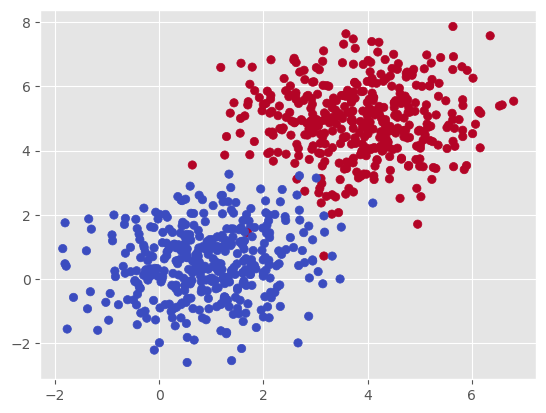

In [36]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, cmap='coolwarm')

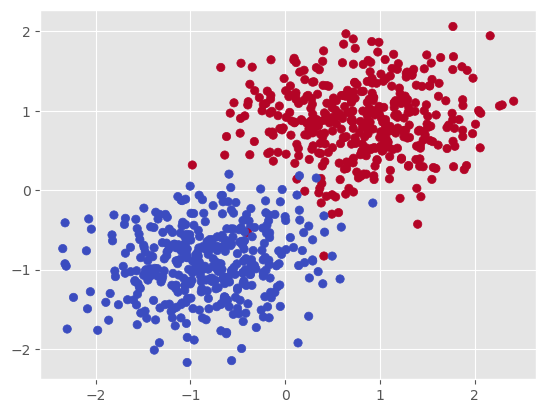

In [37]:
x_mean = np.mean(X_train, axis=0)
x_std = np.std(X_train, axis=0)

X_train = (X_train - x_mean) / x_std

#shifting and scaling the test data as well
X_test = (X_test - x_mean) / x_std


plt.scatter(X_train[:,0],X_train[:,1],c=y_train, cmap='coolwarm')

### Implementation from scratch

In [38]:

""" PARAMETERS:
    X - entire array (m,n+1)    - we have 2 features so n=2 and +1 for bias term
    theta - np.array (n+1, 1)   - multiply with X to get (m,1) result
    y - np.array (m,1)          - actual labels

    then take sigmoid of the result to get probabilities
"""

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

def error(X, y, theta):
    hi = hypothesis(X, theta)
    e = -1 * np.mean(y*np.log(hi) + ((1-y)*np.log(1-hi)))

    return e



In [39]:
#gradient function which returns the gradient vector of n+1,1 shape
def gradient(X, y, theta):
    hi = hypothesis(X, theta)
    m = X.shape[0]

    grad = np.dot(X.T, (y-hi))

    return grad/m


def gradient_descent(X, y, lr=0.1, max_itr=500):
    n = X.shape[1]
    theta = np.zeros((n,1))

    error_list = []

    #Assignment - change the stopping criteria i.e stop when change in e is very small
    for i in range(max_itr):
        e = error(X, y, theta)
        error_list.append(e)

        grad = gradient(X, y, theta)
        theta = theta + lr*grad

    return theta, error_list

In [40]:
ones = np.ones((X_train.shape[0],1))
X_new_train = np.hstack((ones, X_train))  # adding a column of ones to X_train for bias term

y_train = y_train.reshape((-1,1))

In [41]:
theta, error_list = gradient_descent(X_new_train, y_train)

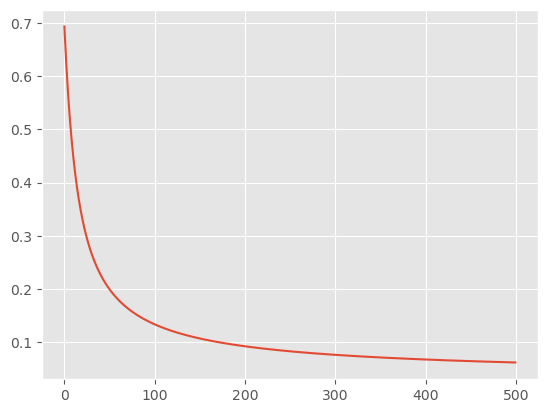

In [42]:
plt.plot(error_list)

In [43]:
theta

array([[0.06537379],
       [2.09355507],
       [2.9060718 ]])

### Visual Decision Surface

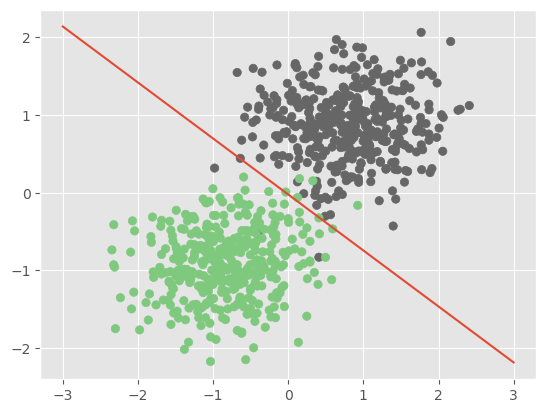

In [44]:
#plotting line
x1 = np.arange(-3,4)
x2 = -(theta[0] + theta[1]*x1)/theta[2]

#plotting scatter points
plt.scatter(X_train[:,0],X_train[:,1], c=y_train.reshape((-1,)), cmap = plt.cm.Accent)

plt.plot(x1,x2)
plt.show()

### Predictions and Accuracy

In [45]:
X_new_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))

In [46]:
def  predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    output = output.astype('int')

    return output

XT_preds = predict(X_new_train, theta)
Xt_preds = predict(X_new_test, theta)


In [47]:
def accuracy(actual,preds):
    actual = actual.astype('int')
    actual = actual.reshape((-1,1))
    acc = np.sum(actual==preds)/actual.shape[0]

    return acc*100

In [48]:
train_acc = accuracy(y_train, XT_preds)
test_acc = accuracy(y_test, Xt_preds)
print (train_acc, test_acc)


99.0 99.5


### Logistic Regression using SK-Learn

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression()

In [51]:
model.fit(X_train, y_train.reshape((-1,)))

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [52]:
theta_0 = model.intercept_
theta_s = model.coef_

print (theta_0, theta_s)

[0.08068455] [[2.57885416 4.39564288]]


In [53]:
#Scores on test and train data
model.score(X_train, y_train.reshape((-1,))), model.score(X_test, y_test.reshape((-1,)))

(0.99, 0.995)

In [55]:
y_pred = model.predict(X_test)
y_pred.shape

(200,)